# Actor & Critic Method

## Prepare the packages

In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import sys
if "../" not in sys.path:
    sys.path.append("../") 

In [17]:
import numpy as np
import gym
from el_agent import ELAgent
from frozen_lake_util import show_q_value

## Define Actor

In [18]:
class Actor(ELAgent):

    def __init__(self, env):
        super().__init__(epsilon=-1)
        nrow = env.observation_space.n
        ncol = env.action_space.n
        self.actions = list(range(env.action_space.n))
        self.Q = np.random.uniform(0, 1, nrow * ncol).reshape((nrow, ncol))

    def softmax(self, x):
        return np.exp(x) / np.sum(np.exp(x), axis=0)

    def policy(self, s):
        a = np.random.choice(self.actions, 1,
                             p=self.softmax(self.Q[s]))
        return a[0]

## Define Critic

In [19]:
class Critic():

    def __init__(self, env):
        states = env.observation_space.n
        self.V = np.zeros(states)

## Define Actor & Critic Training Process

In [20]:
class ActorCritic():

    def __init__(self, actor_class, critic_class):
        self.actor_class = actor_class
        self.critic_class = critic_class

    def train(self, env, episode_count=100000, gamma=0.9,
              learning_rate=0.1,
              render=False, report_interval=100):
        actor = self.actor_class(env)
        critic = self.critic_class(env)

        actor.init_log()
        for e in range(episode_count):
            s = env.reset()
            done = False
            while not done:
                if render:
                    env.render()
                a = actor.policy(s)
                n_state, reward, done, info = env.step(a)

                gain = reward + gamma * critic.V[n_state]
                estimated = critic.V[s]
                td = gain - estimated
                actor.Q[s][a] += learning_rate * td
                critic.V[s] += learning_rate * td
                s = n_state

            else:
                actor.log(reward)

            if e != 0 and e % report_interval == 0:
                actor.show_reward_log(episode=e)

        return actor, critic

## Train Agent

In [21]:
def train():
    trainer = ActorCritic(Actor, Critic)
    env = gym.make("FrozenLakeEasy-v0")
    actor, critic = trainer.train(env, episode_count=3000)
    show_q_value(actor.Q)
    actor.show_reward_log()

At Episode 100 average reward is 0.01 (+/-0.099).
At Episode 200 average reward is 0.03 (+/-0.171).
At Episode 300 average reward is 0.02 (+/-0.14).
At Episode 400 average reward is 0.02 (+/-0.14).
At Episode 500 average reward is 0.0 (+/-0.0).
At Episode 600 average reward is 0.02 (+/-0.14).
At Episode 700 average reward is 0.01 (+/-0.099).
At Episode 800 average reward is 0.04 (+/-0.196).
At Episode 900 average reward is 0.11 (+/-0.313).
At Episode 1000 average reward is 0.06 (+/-0.237).
At Episode 1100 average reward is 0.16 (+/-0.367).
At Episode 1200 average reward is 0.3 (+/-0.458).
At Episode 1300 average reward is 0.49 (+/-0.5).
At Episode 1400 average reward is 0.7 (+/-0.458).
At Episode 1500 average reward is 0.75 (+/-0.433).
At Episode 1600 average reward is 0.91 (+/-0.286).
At Episode 1700 average reward is 0.89 (+/-0.313).
At Episode 1800 average reward is 0.9 (+/-0.3).
At Episode 1900 average reward is 0.98 (+/-0.14).
At Episode 2000 average reward is 0.99 (+/-0.099).
At 

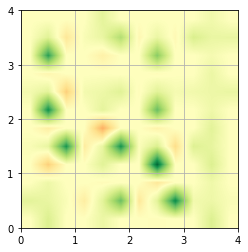

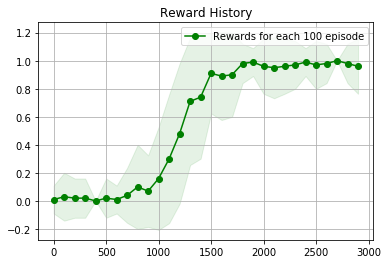

In [22]:
agent = train()